<a href="https://colab.research.google.com/github/Abhilash2240/AIML/blob/main/AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Target vectors
import pandas as pd

# Assuming the data is in a CSV file and needs to be loaded into a pandas DataFrame:
user_data = pd.read_csv('/content/user_behavior_dataset.csv')

target_vector = user_data
print(target_vector.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [ ]:
#Feature vectors
import pandas as pd
user_data = pd.read_csv('/content/user_behavior_dataset.csv')

feature_vectors = user_data

numeric_features = feature_vectors.select_dtypes(include=['number'])

print(numeric_features.head())

   User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
0        1                       393                         6.4   
1        2                       268                         4.7   
2        3                       154                         4.0   
3        4                       239                         4.8   
4        5                       187                         4.3   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                     1872                        67                 1122   
1                     1331                        42                  944   
2                      761                        32                  322   
3                     1676                        56                  871   
4                     1367                        58                  988   

   Age  User Behavior Class  
0   40                    4  
1   47                    3  
2   42                    2  
3   20  

In [ ]:
#SVM
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

features = user_data.drop(['User ID', 'User Behavior Class'], axis=1)
numeric_features = features.select_dtypes(include=['number'])  # Use numeric features only
target = user_data['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)  # You can try different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

features = user_data.drop(['User ID', 'User Behavior Class'], axis=1)
numeric_features = features.select_dtypes(include=['number'])
target = user_data['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



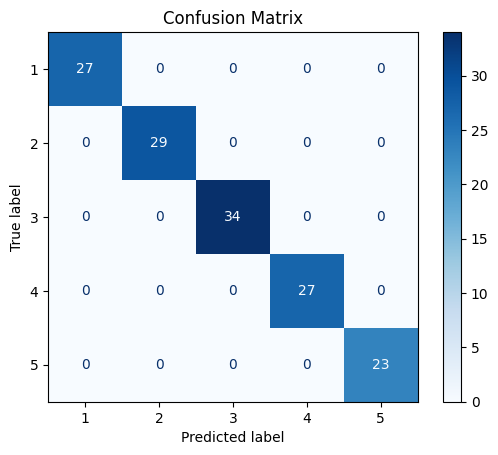

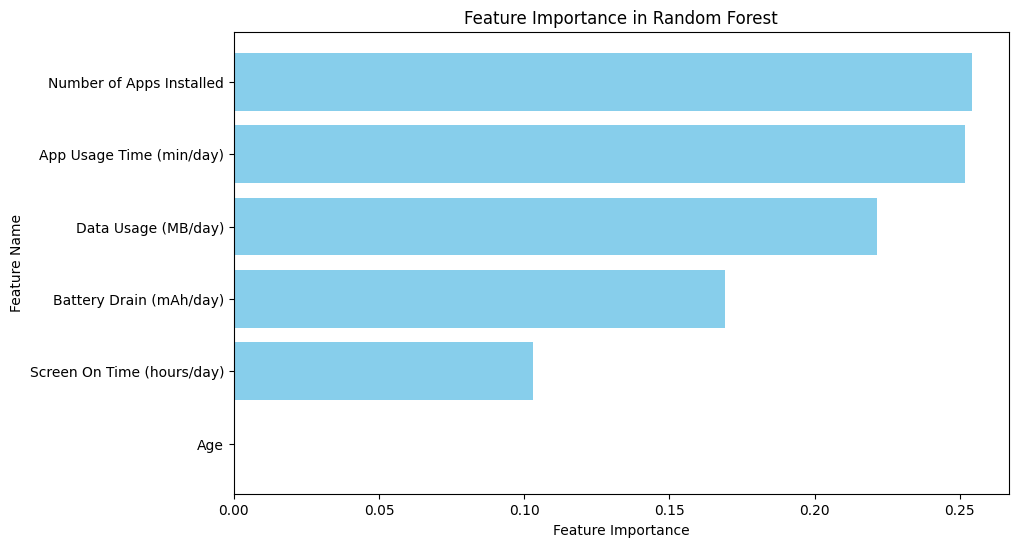

In [ ]:
#Random forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
importances = rf_model.feature_importances_
feature_names = numeric_features.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest')
plt.show()



Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



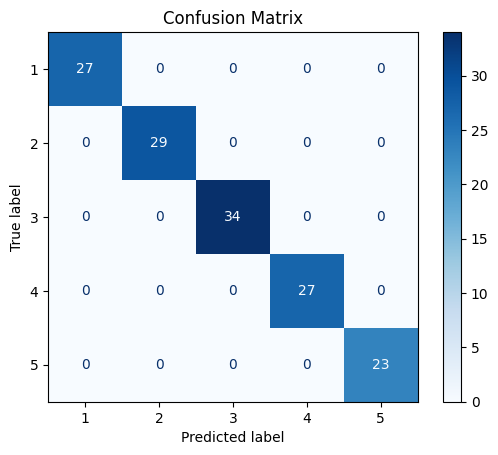

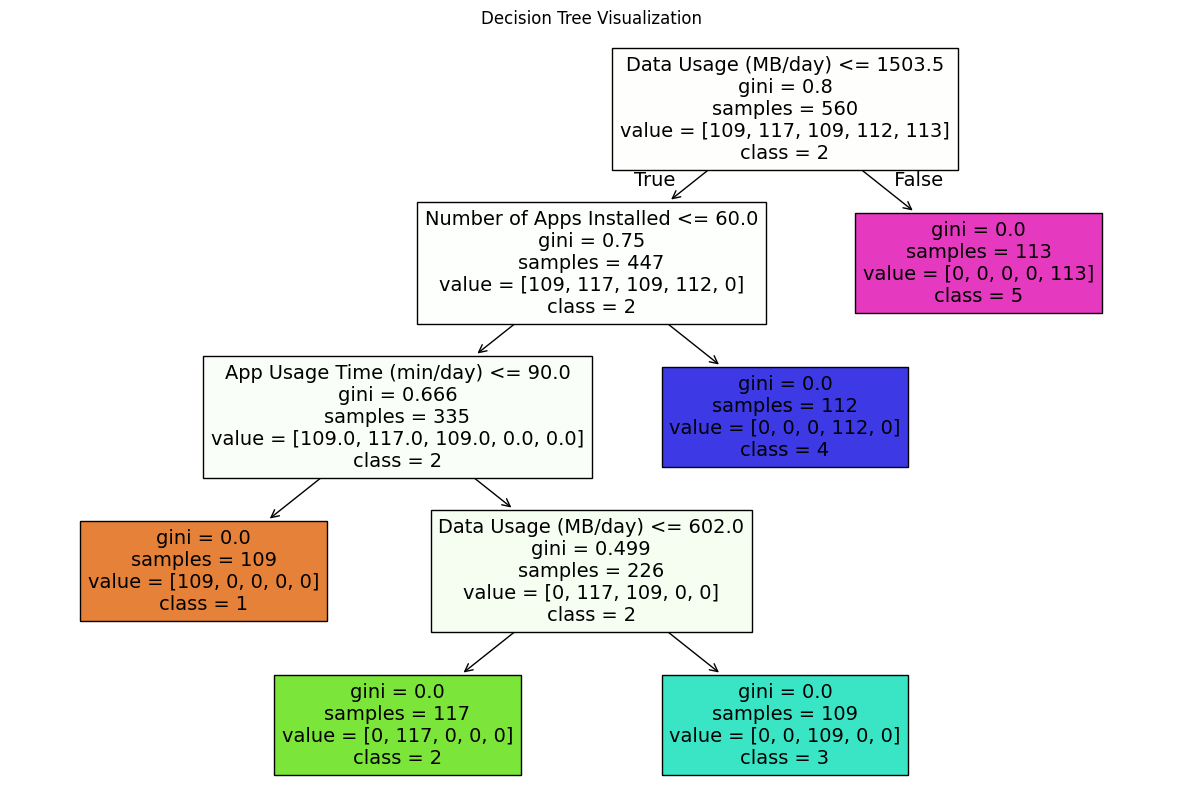

In [ ]:
#decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
features = user_data.drop(['User ID', 'User Behavior Class'], axis=1)
numeric_features = features.select_dtypes(include=['number'])
target = user_data['User Behavior Class']

X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=numeric_features.columns, class_names=dt_model.classes_.astype(str), filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Mean Squared Error: 0.03
R^2 Score: 0.98


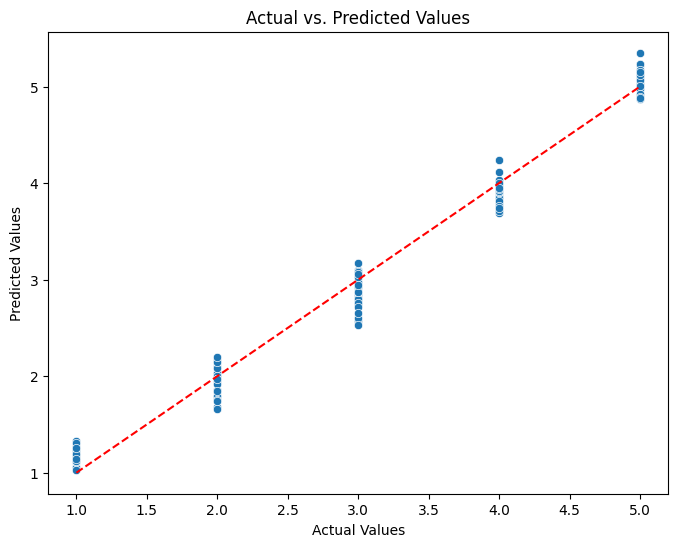

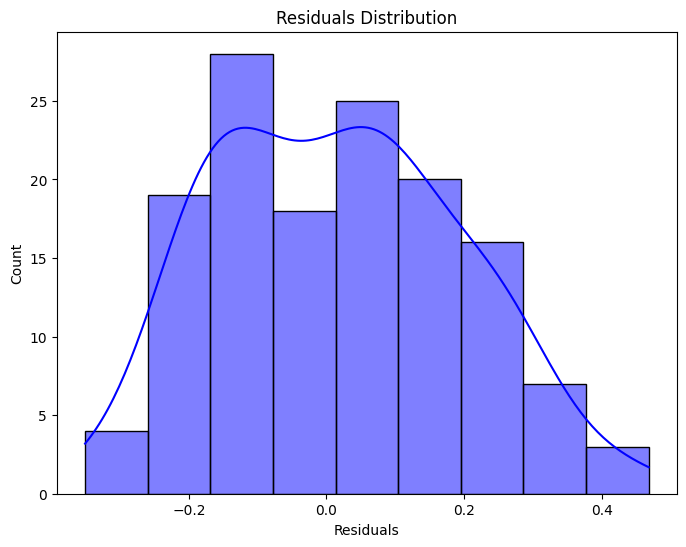

In [ ]:
#liner regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
features = user_data.drop(['User ID', 'User Behavior Class'], axis=1)
numeric_features = features.select_dtypes(include=['number'])
target = user_data['User Behavior Class']  # Assuming continuous values; otherwise, regression isn't applicable

X_train, X_test, y_train, y_test = train_test_split(numeric_features, target, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot Predicted vs. Actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


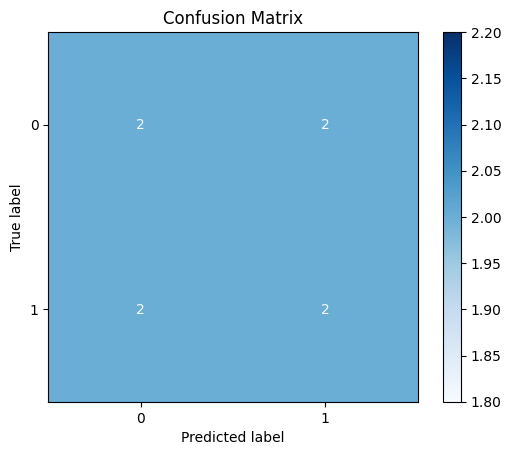

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predicted labels
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1])  # True labels
y_pred = np.array([0, 0, 1, 1, 0, 1, 1, 0])  # Predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

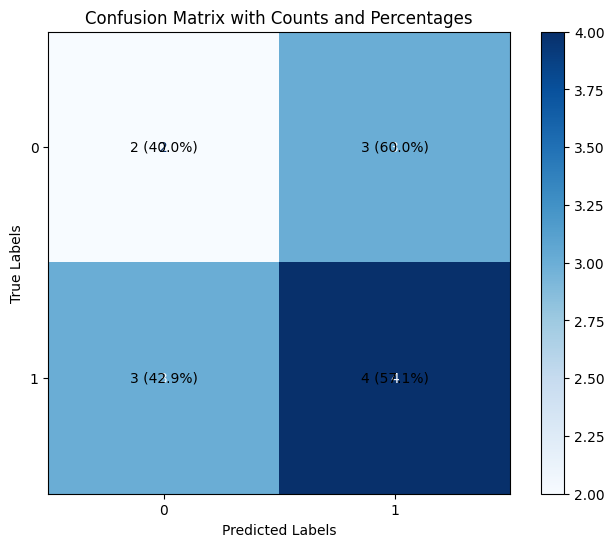

In [ ]:
#confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predicted labels
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])  # True labels
y_pred = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])  # Predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate the percentage of each cell
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Display the confusion matrix with counts and percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')  # 'd' for counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'{cm[i, j]} ({cm_percentage[i, j]:.1f}%)',
                ha='center', va='center', color='black')

# Set title and labels
plt.title('Confusion Matrix with Counts and Percentages')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(np.unique(y_true))), labels=np.unique(y_true))
plt.yticks(ticks=np.arange(len(np.unique(y_true))), labels=np.unique(y_true))
plt.show()